# 20 Seaborn sneak peek

Seaborn is built on top of matplotlib :) So quite easy to use.

Seaborn we can integrate a lot more visuals / coloring / layouts, etc. We can turn it into a lot more appealing visuals.

All the info on the website: https://seaborn.pydata.org/

The API section of the website is telling us all about the various plots that we can use.

In [1]:
# import librairies

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# load data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# clean data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\erard\Anaconda3\envs\Luke_Barousse_Python_Course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## need to install + import seaborn!

- Go to the right environment
- type in conda install seaborn
- then import seaborn

In [2]:
import seaborn as sns

## Let's update some visuals from the previous lessons

### Bar charts

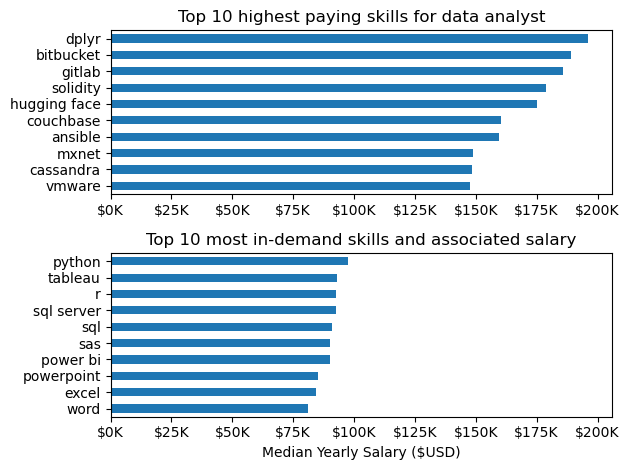

In [5]:
# this is what we've done in lesson 19

df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy().dropna(subset="salary_year_avg")

df_DA_US = df_DA_US.explode("job_skills")

df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])

df_DA_top_pay = df_DA_US_group.sort_values(by="median", ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by="count", ascending=False).head(10).sort_values(by="median", ascending=False).head(10) # sorting twice to have the appropriate ordering

fig, ax = plt.subplots(2, 1)

df_DA_top_pay.plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title("Top 10 highest paying skills for data analyst")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

df_DA_skills.plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim()) # setting the x-axis of the bottom one to be exactly the same as the top one! Pretty neat
ax[1].set_title("Top 10 most in-demand skills and associated salary")
ax[1].set_xlabel("Median Yearly Salary ($USD)")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

plt.tight_layout()
plt.show()

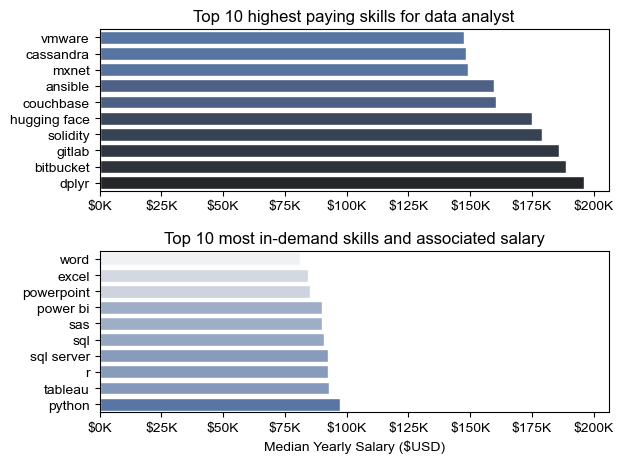

In [15]:
# here's what we could do in seaborn

fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, ax=ax[0], hue="median", palette="dark:b_r")
ax[0].legend().remove()

# df_DA_top_pay.plot(kind="barh", y="median", ax=ax[0], legend=False)

ax[0].invert_yaxis()
ax[0].set_title("Top 10 highest paying skills for data analyst")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))


sns.barplot(data=df_DA_skills, x="median", y=df_DA_skills.index, ax=ax[1], hue="median", palette="light:b")
ax[1].legend().remove()

# df_DA_skills.plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim()) # setting the x-axis of the bottom one to be exactly the same as the top one! Pretty neat
ax[1].set_title("Top 10 most in-demand skills and associated salary")
ax[1].set_xlabel("Median Yearly Salary ($USD)")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

plt.tight_layout()
plt.show()

### histograms

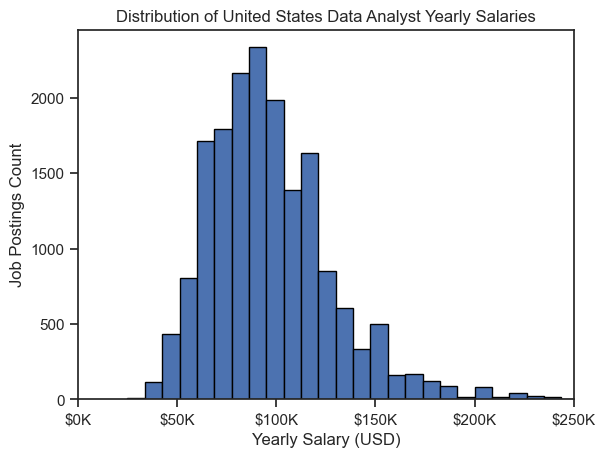

In [17]:
df_DA_US["salary_year_avg"].plot(kind="hist", bins=40, edgecolor="black")
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("Job Postings Count")
plt.show()

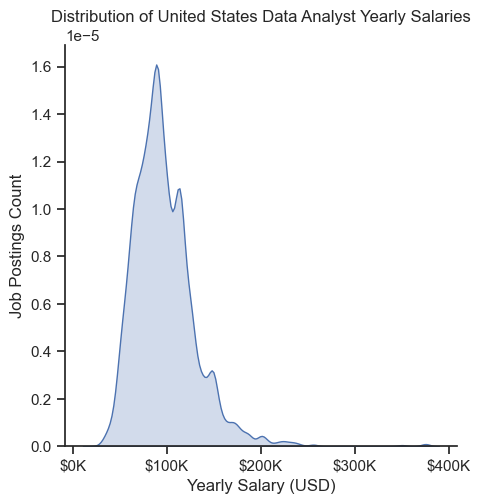

In [23]:
sns.displot(df_DA_US["salary_year_avg"], kind="kde", fill=True)
sns.set_theme(style="ticks")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("Job Postings Count")
plt.show()

### box plots

C:\Users\erard\AppData\Local\Temp\ipykernel_33316\3689024052.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


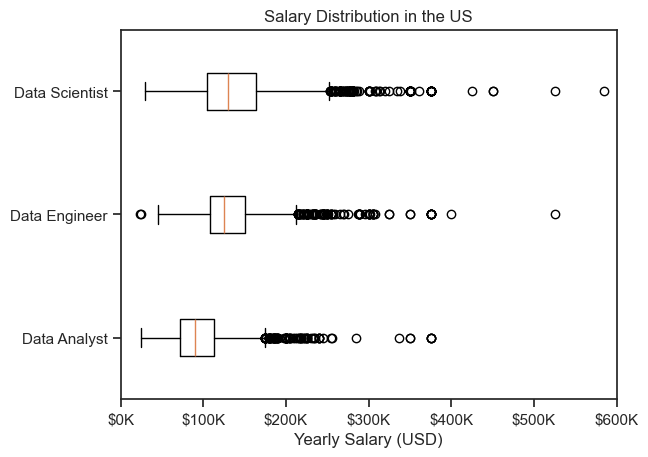

In [24]:
# create a list of job titles
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

# create a df for the US

df_US = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()

df_US = df_US.dropna(subset="salary_year_avg")

# Create a list comprehension to split the salary data for each job title in job titles  
job_list = [df_US[df_US["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]

# plot
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distribution in the US")
plt.xlabel("Yearly Salary (USD)")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

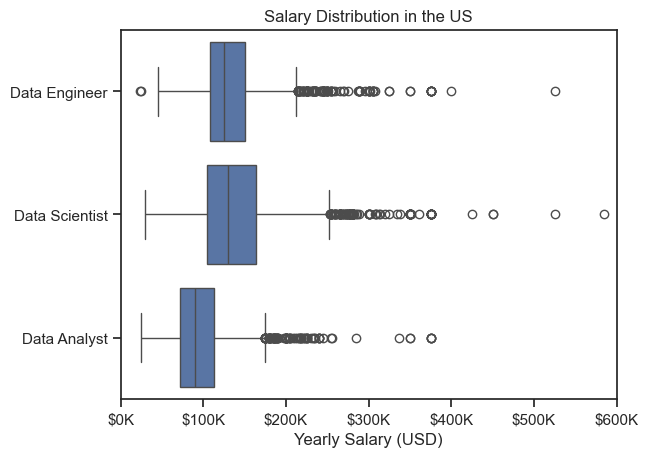

In [27]:
sns.boxplot(data=df_US, x="salary_year_avg", y="job_title_short")
sns.set_theme(style="ticks")

plt.title("Salary Distribution in the US")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

# 20 Problems

## 2.20.1

Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for Data Scientist job postings in the United States.

C:\Users\erard\AppData\Local\Temp\ipykernel_33316\4246973999.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_DS_US_grouped, x="median_salary", y="company_name", palette="light:b_r")


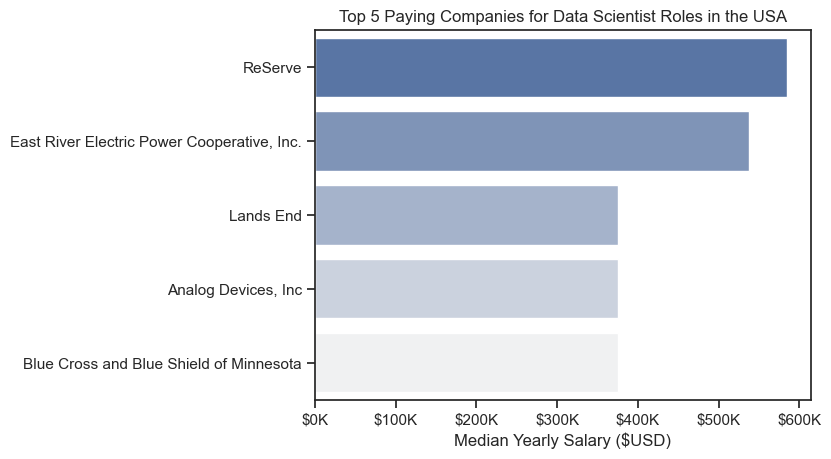

<Figure size 640x480 with 0 Axes>

In [46]:
# create a df that filters for Data Scientist Josb in the US

df_DS_US = df[(df["job_title_short"] == "Data Scientist") & (df["job_country"] == "United States")].copy().dropna(subset="salary_year_avg")

# group by company and average salary

df_DS_US_grouped = df_DS_US.groupby("company_name").agg(
    job_count =("company_name", "count"),
    median_salary=("salary_year_avg", "median")
).sort_values(by="median_salary", ascending=False).head(5)

# plot the graph
sns.barplot(data=df_DS_US_grouped, x="median_salary", y="company_name", palette="light:b_r")
sns.set_theme(style="ticks")

plt.title("Top 5 Paying Companies for Data Scientist Roles in the USA")
plt.xlabel("Median Yearly Salary ($USD)")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.ylabel("")
plt.show()
plt.tight_layout()

## 2.20.2

Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the salary_year_avg column) for Data Scientist job postings in the United States:

- Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
- Use 25 bins for the histogram and set the x-axis limit to 700,000.
- Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

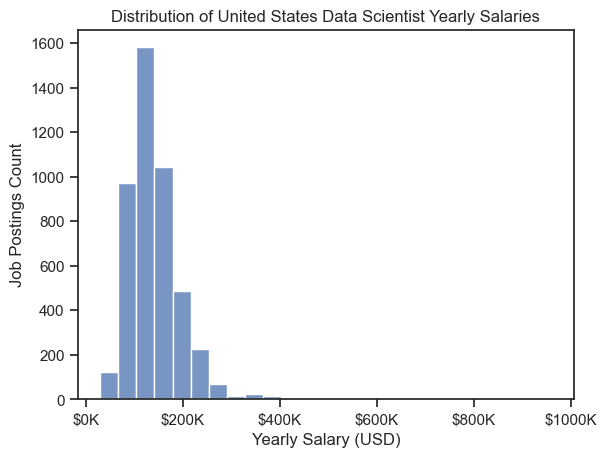

In [51]:
# we already have the right df from the first problem
# plot the graph

sns.histplot(df_DS_US["salary_year_avg"], bins=25, fill=True)
sns.set_theme(style="ticks")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title("Distribution of United States Data Scientist Yearly Salaries")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("Job Postings Count")
plt.show()

## 2.20.3

Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

- Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
- Set the x-axis limit to 300,000 and format it as $100k.
- Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.

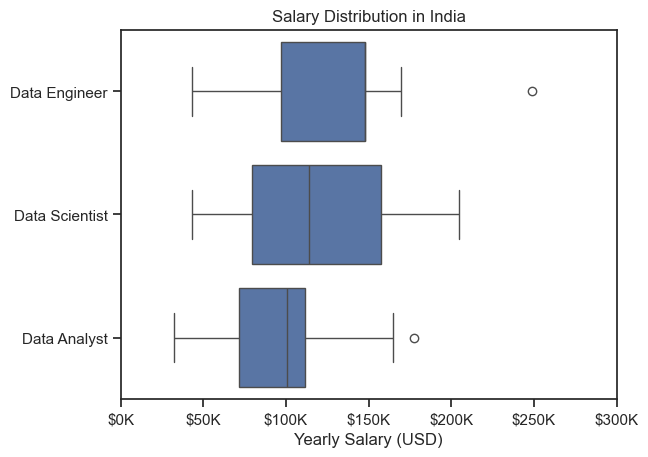

In [ ]:
# create df - using the job_titles list created earlier

df_IN = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "India")].copy().dropna(subset="salary_year_avg")

# plot the graph

sns.boxplot(data=df_IN, x="salary_year_avg", y="job_title_short")
sns.set_theme(style="ticks")

plt.title("Salary Distribution in India")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 300000)
plt.show()


## 2.20.4

- Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.
- Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.

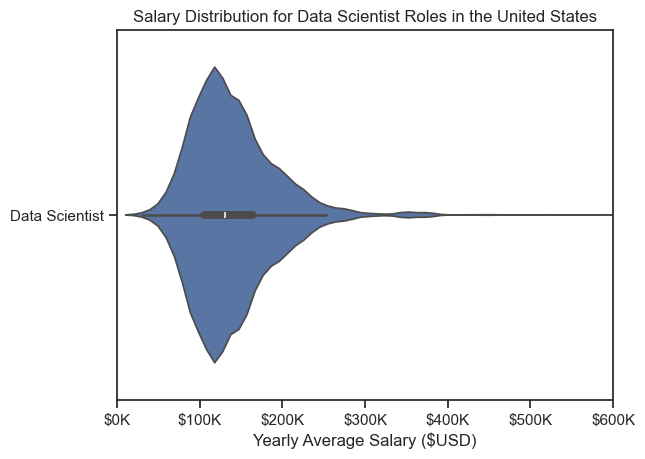

In [64]:
# plot

sns.violinplot(data=df_DS_US, x="salary_year_avg", y="job_title_short")
sns.set_theme(style="ticks")

plt.title("Salary Distribution for Data Scientist Roles in the United States")
plt.xlabel("Yearly Average Salary ($USD)")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 600000)
plt.ylabel("")
plt.show()